# Daily BIke rental prediction


### Loading dataset

In [1]:
import pandas as pd
import numpy as np
import copy,math
import matplotlib.pyplot as plt
data=pd.read_csv('../data/day.csv')
import random

### Data Analysis

In [2]:
print(data.shape) 
print(data.columns)    
print(data.head())   

(731, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0

### Feature Selections

In [3]:
X_train = data[["season","yr","mnth","holiday","workingday","weathersit","temp", "hum", "windspeed"]].values
Y_train = data["cnt"].values


### Splitting Data

In [4]:
combined_data=np.hstack((X_train,Y_train.reshape(-1,1)))
np.random.seed(42)
np.random.shuffle(combined_data)

split_point=int(0.8*(len(combined_data)))
train_data=combined_data[:split_point]
test_data=combined_data[split_point:]

X_train=train_data[:,:-1]
Y_train=train_data[:,-1]

X_test=test_data[:,:-1]
Y_test=test_data[:,-1]

print("Training data shapes:", X_train.shape, Y_train.shape)
print("Testing data shapes:", X_test.shape, Y_test.shape)

Training data shapes: (584, 9) (584,)
Testing data shapes: (147, 9) (147,)


### Standardization

In [5]:
X_Mean=np.mean(X_train,axis=0)
sigma=np.std(X_train,axis=0)
X_train=(X_train-X_Mean)/sigma
Y_mean = np.mean(Y_train)
Y_std = np.std(Y_train)
Y_train_normalized = (Y_train - Y_mean) / Y_std
X_test=(X_test-X_Mean)/sigma

In [6]:
print(X_train[:5])
print(Y_train_normalized[:5])
print(X_train.shape, Y_train_normalized.shape)

[[ 1.32076426  1.01379376  1.5451667  -0.16783627  0.648787   -0.71464611
  -0.10121904  0.76564249 -0.22788842]
 [-1.34818497 -0.98639392 -1.33690725 -0.16783627  0.648787   -0.71464611
  -1.69743943 -1.30181773  1.06411968]
 [ 1.32076426 -0.98639392  0.96875191 -0.16783627  0.648787    1.12391481
  -0.90243463 -0.26777323  0.4622349 ]
 [-0.45853523  1.01379376 -0.76049246 -0.16783627 -1.54133791  1.12391481
  -0.37750028  0.36392123 -0.25110449]
 [ 1.32076426  1.01379376  0.68054452 -0.16783627  0.648787   -0.71464611
   0.30859998 -0.3783898   0.54754336]]
[ 1.09585054 -1.53078193 -0.38942285  0.80232852  1.58003201]
(584, 9) (584,)


In [7]:
w_init=np.zeros(X_train.shape[1])
b_init=100

### Cost Function

In [8]:
def compute_cost(X,Y,w,b):
    prediction=np.dot(X,w)+b
    m=X.shape[0]
    errors=prediction-Y
    cost=np.sum(errors**2)/(2*m)
    return cost

### compute gradients

In [9]:
def compute_gradient(X,Y,w,b):
    m,n=X.shape
    prediction=np.dot(X,w)+b
    error=prediction-Y
    dj_dw=(1/m)* np.dot(X.T,error)
    dj_db=(1/m)*np.sum(error)
    return dj_dw, dj_db

### Gradient descent

In [10]:
def gradient_descent(X,Y,w,b,learning_rate,iterations):
    J_hist=[]
    w_t=copy.deepcopy(w)
    b_t=b
    for i in range(iterations):
        dj_dw,dj_db=compute_gradient(X,Y,w_t,b_t)
        w_t=w_t-learning_rate*dj_dw
        b_t=b_t-learning_rate*dj_db
        cost=compute_cost(X,Y,w_t,b_t)
        J_hist.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}, w: {w_t}, b: {b_t}")
    return w_t, b_t, J_hist

In [11]:
w_final, b_final, J_hist = gradient_descent(
    X_train, Y_train_normalized, w_init, b_init,
    learning_rate=0.01, iterations=1000
)

Iteration 0: Cost 4900.989360014539, w: [ 0.00393298  0.00554821  0.00255794 -0.00079517  0.00042744 -0.00290101
  0.00624188 -0.0008869  -0.00233102], b: 99.0
Iteration 100: Cost 656.707987083261, w: [ 0.16896275  0.34335505  0.07194188 -0.04339121  0.02702819 -0.15124278
  0.34871048 -0.06059566 -0.10568271], b: 36.23720178604976
Iteration 200: Cost 88.0778561756119, w: [ 0.19655557  0.4592999   0.04599657 -0.05235862  0.03522415 -0.17744744
  0.45144832 -0.07603061 -0.12225737], b: 13.263987810938238
Iteration 300: Cost 11.893021820222726, w: [ 0.20917406  0.49975753  0.02191267 -0.05304274  0.03709761 -0.17822945
  0.48676629 -0.0785955  -0.12475702], b: 4.855048513057303
Iteration 400: Cost 1.6855084612662696, w: [ 0.22009372  0.51407423  0.00487462 -0.0522766   0.03723023 -0.17555424
  0.49945947 -0.07914944 -0.12480612], b: 1.777104774229476
Iteration 500: Cost 0.31770871759797903, w: [ 0.23007016  0.5191835  -0.0075604  -0.05158246  0.03701099 -0.1733588
  0.5038089  -0.0796224

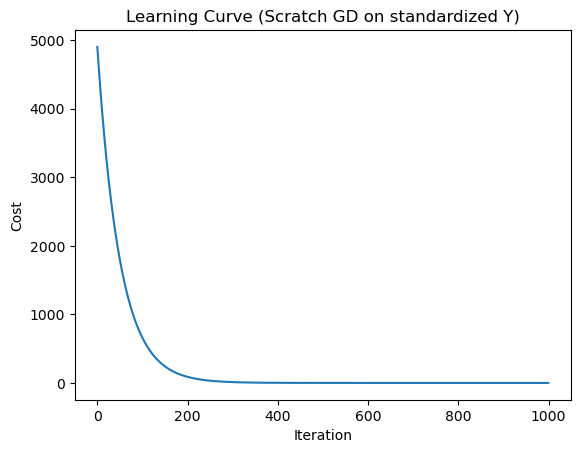

In [12]:
import matplotlib.pyplot as plt

plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Learning Curve (Scratch GD on standardized Y)")
plt.show()


In [13]:
print("\nFinal parameters:")
print("w:", w_final)
print("b:", b_final)


Final parameters:
w: [ 0.26294339  0.52204118 -0.04084319 -0.05057679  0.03627818 -0.17019299
  0.50311076 -0.08090036 -0.12413509]
b: 0.004317124741065534


### Visualization

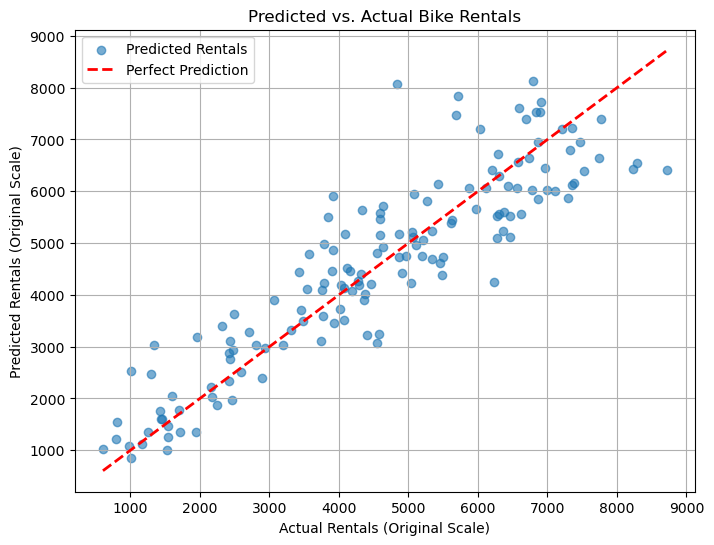

In [14]:
preds_normalized = np.dot(X_test, w_final) + b_final
preds_actual = (preds_normalized * Y_std) + Y_mean
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, preds_actual, alpha=0.6, label="Predicted Rentals")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', linewidth=2, linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Rentals (Original Scale)")
plt.ylabel("Predicted Rentals (Original Scale)")
plt.title("Predicted vs. Actual Bike Rentals")
plt.legend()
plt.grid(True)
plt.show()

### Evaluation

In [15]:
mae = np.mean(np.abs(Y_test - preds_actual))
print(f"Mean Absolute Error (MAE): {mae:.2f} rentals")

mse = np.mean((Y_test - preds_actual)**2)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} rentals")

Mean Absolute Error (MAE): 651.99 rentals
Root Mean Squared Error (RMSE): 859.36 rentals


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


sklearn_model = LinearRegression()

sklearn_model.fit(X_train, Y_train)


preds_sklearn = sklearn_model.predict(X_test)


mae_sklearn = mean_absolute_error(Y_test, preds_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(Y_test, preds_sklearn))

print("--- Scikit-learn Model Results ---")
print(f"Mean Absolute Error (MAE): {mae_sklearn:.2f} rentals")
print(f"Root Mean Squared Error (RMSE): {rmse_sklearn:.2f} rentals")

print("\n--- Your 'From Scratch' Model Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} rentals") 
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} rentals") 


--- Scikit-learn Model Results ---
Mean Absolute Error (MAE): 651.96 rentals
Root Mean Squared Error (RMSE): 857.62 rentals

--- Your 'From Scratch' Model Results ---
Mean Absolute Error (MAE): 651.99 rentals
Root Mean Squared Error (RMSE): 859.36 rentals


## Save Results

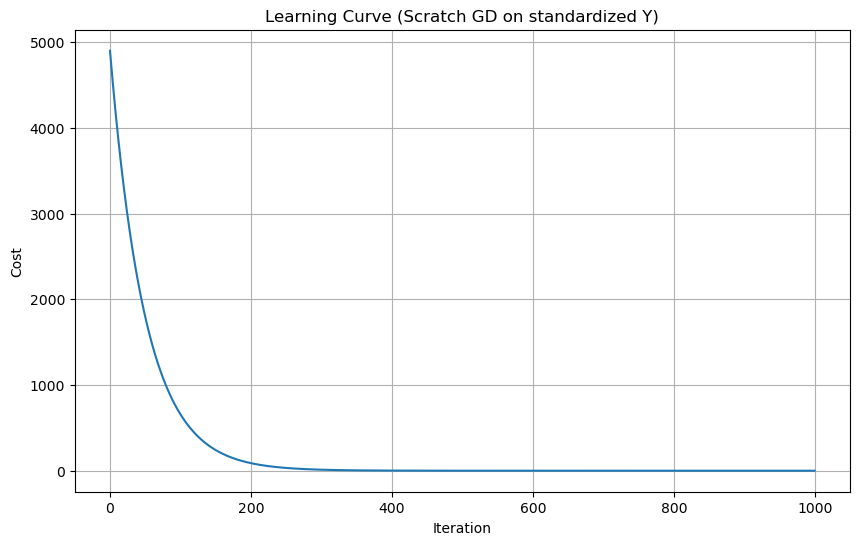

NameError: name 'y_train' is not defined

In [ ]:
# Create and save additional visualizations using existing variables
# Save the predicted vs actual plot (already exists in the notebook)
y_test_pred_final = X_test @ w_final + b_final
actual_original = y_test_standarized * np.std(y) + np.mean(y)
pred_original = y_test_pred_final * np.std(y) + np.mean(y)

plt.figure(figsize=(10, 8))
plt.scatter(actual_original, pred_original, alpha=0.7, color='skyblue', s=50)
plt.plot([actual_original.min(), actual_original.max()], 
         [actual_original.min(), actual_original.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Predicted vs. Actual Bike Rentals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../results/predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# Save regression line visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], actual_original, alpha=0.7, color='lightblue', label='Actual Data')
sorted_indices = np.argsort(X_test[:, 0])
plt.plot(X_test[sorted_indices, 0], pred_original[sorted_indices], 'r-', linewidth=2, label='Regression Line')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Bike Rentals')
plt.title('Regression Line Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../results/regression_line.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Additional Linear Regression results saved!")